## Table of Contents:


1. [Pre-Processing Data](#Pre-Processing-Data)

   1.1. [Importing all required libraries](#Importing-all-required-libraries)
    
   1.2. [Descriptive Part](#Descriptive-Part)
        
   1.3. [Data Cleaning](#Data-Cleaning)
        
     1.3.1. [Missing Values](#Missing-Values)
     
      1.3.2. [Duplicate Values](#Duplicate-Values) 
***

2. [Correlation Matrix](#Correlation-Matrix) 

***

3. [Data Visualisation](#Data-Visualisation) 

   3.1. [Products Analysis](#Products-Analysis)
   
   3.2. [Customers Analysis](#Customers-Analysis)
      
   3.3. [Customer Segment by Products](#Customer-Segment-by-Products)
      
   3.4. [Routes Analysis](#Routes-Analysis)
      
   3.5. [Transportation-Modes](#Transportation-Modes)
      
   3.6. [Routes and Transportation modes](#Routes-and-Transportation-modes)
   

   *****
   
4. [Data Modelling](#Data-Modelling)   

   4.1. [Regression Models ](#Regression-Models)

      4.1.1. [Linear Regression for Stock Level](#Linear-Regression-for-Stock-Level)
      
      4.1.2. [Linear Regression for Transportation Costs](#Linear-Regression-for-Transportation-Costs)

   4.2. [Classification Models](#Classification-Models)

      4.2.1.[KNN Classifier for Routes](#KNN-Classifier-for-Routes)
    



## Pre-Processing Data

### Importing all required libraries

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore") 
import datetime as dt
from datetime import datetime
import plotly.express as px
import ortools.constraint_solver
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
from scipy.optimize import linprog
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import classification_report

In [3]:
MPSCData=pd.read_csv("/kaggle/input/supply-chain-analysis/supply_chain_data.csv")

## Descriptive Part

In [4]:
MPSCData.shape  #Checking the lengths of the array dimensions

(100, 24)

In [5]:
MPSCData.dtypes  #Checking the number of variables and their type

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

***

In [6]:
MPSCData.head(10)  #Checking the top 10 rows in the dataset

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   
5     haircare  SKU5   1.699976            87                      147   
6     skincare  SKU6   4.078333            48                       65   
7    cosmetics  SKU7  42.958384            59                      426   
8    cosmetics  SKU8  68.717597            78                      150   
9     skincare  SKU9  64.015733            35                      980   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   
5        2828.348746            Non-binary            90          27   
6        7823.476560                  Male            11          15   
7        8496.103813                Female            93          17   
8        7517.363211                Female             5          10   
9        4971.145988               Unknown            14          27   

   Order quantities  ...   Location Lead time  Production volumes  \
0                96  ...     Mumbai        29                 215   
1                37  ...     Mumbai        23                 517   
2                88  ...     Mumbai        12                 971   
3                59  ...    Kolkata        24                 937   
4                56  ...      Delhi         5                 414   
5                66  ...  Bangalore        10                 104   
6                58  ...    Kolkata        14                 314   
7                11  ...  Bangalore        22                 564   
8                15  ...     Mumbai        13                 769   
9                83  ...    Chennai        29                 963   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   
5                      17           56.766476                Fail   
6                      24            1.085069             Pending   
7                       1           99.466109                Fail   
8                       8           11.423027             Pending   
9                      23           47.957602             Pending   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  
5      2.779194                  Road  Route A  235.461237  
6      1.000911                   Sea  Route A  134.369097  
7      0.398177                  Road  Route C  802.056312  
8      2.709863                   Sea  Route B  505.557134  
9      3.844614                  Rail  Route B  995.929461  

[10 rows x 24 columns]

***

In [7]:
MPSCData.info()  #Checking the type of column structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

***

In [8]:
MPSCData.describe()  # Returning statistical description of the data in the Dataset

Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0.000000    1.000000          1.000000        1.000000   
25%       16.750000    8.000000         26.000000        3.750000   
50%       47.500000   17.000000         52.000000        6.000000   
75%       73.000000   24.000000         71.250000        8.000000   
max      100.000000   30.000000         96.000000       10.000000   

       Shipping costs   Lead time  Production volumes  \
count      100.000000  100.000000          100.000000   
mean         5.548149   17.080000          567.840000   
std          2.651376    8.846251          263.046861   
min          1.013487    1.000000          104.000000   
25%          3.540248   10.000000          352.000000   
50%          5.320534   18.000000          568.500000   
75%          7.601695   25.000000          797.000000   
max          9.929816   30.000000          985.000000   

       Manufacturing lead time  Manufacturing costs  Defect rates       Costs  
count                100.00000           100.000000    100.000000  100.000000  
mean                  14.77000            47.266693      2.277158  529.245782  
std                    8.91243            28.982841      1.461366  258.301696  
min                    1.00000             1.085069      0.018608  103.916248  
25%                    7.00000            22.983299      1.009650  318.778455  
50%                   14.00000            45.905622      2.141863  520.430444  
75%                   23.00000            68.621026      3.563995  763.078231  
max                   30.00000            99.466109      4.939255  997.413450

A brief explanation of the values in the table above:

Since the target variables are "Stock levels" and "Route Costs", their descriptive statistics indicators are significant.
1)The average of the "Stock level" is 47.77, with a minimum of 0, and a maximum of 100.0.  This variable has a very wide Range, so its values are more dispersed.
As the Second Quantile (Q2) is the Median, the median value is 47.50, which is almost the same as the mean, so the data are normally distributed (symmetric).

Also, the minimum stock level is an alarm for the company that is facing shortage of inventory for that SKU.

2)The average of the "Route Costs" is 529.25, with a minimum of 103.92, and a maximum of 997.41. This variable has a very wide Range.
As the Second Quantile (Q2) is the Median, the median value is 520.43, almost equal to the mean, so the data are normally distributed (symmetric).

## Data Cleaning

### Missing Values

In [9]:
np.sum(MPSCData.isna()) #Checking the number of missing values for each variable

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

As can be seen, there are no missing values in this dataset.

### Duplicate Values

In [10]:
MPSCData.duplicated().sum()

0

This dataset also has no duplicate values.

### Cleaning

In [11]:
MPSCData.columns = [col.lower().replace(' ', '_') for col in MPSCData.columns]
MPSCData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [12]:
MPSCData.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs'],
      dtype='object')

***********

## Correlation Matrix

 In the business world, knowing the relationship between two variables is very valuable for data-driven decision-making.  In this case, the "correlation coefficient" can be used to calculate the relationship between two quantitative variables. 

To examine the relationship between the product type, customer demographics, shipping carriers, location, transportation modes, inspection results, routes, and the two target variables of inventory level and transport cost, we must first convert these object characteristics into the "int" type using the following library and code:

In [13]:
MP_SC = MPSCData.copy()

In [14]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
MP_SC['product_type']= le.fit_transform(MP_SC['product_type'])#convert the categorical columns into numeric
MP_SC['customer_demographics']= le.fit_transform(MP_SC['customer_demographics'])
MP_SC['shipping_carriers']= le.fit_transform(MP_SC['shipping_carriers'])
MP_SC['location']= le.fit_transform(MP_SC['location'])
MP_SC['sku']= le.fit_transform(MP_SC['sku'])
MP_SC['inspection_results']= le.fit_transform(MP_SC['inspection_results'])
MP_SC['transportation_modes']= le.fit_transform(MP_SC['transportation_modes'])
MP_SC['routes']= le.fit_transform(MP_SC['routes'])
MP_SC['supplier_name']= le.fit_transform(MP_SC['supplier_name'])

<Axes: >

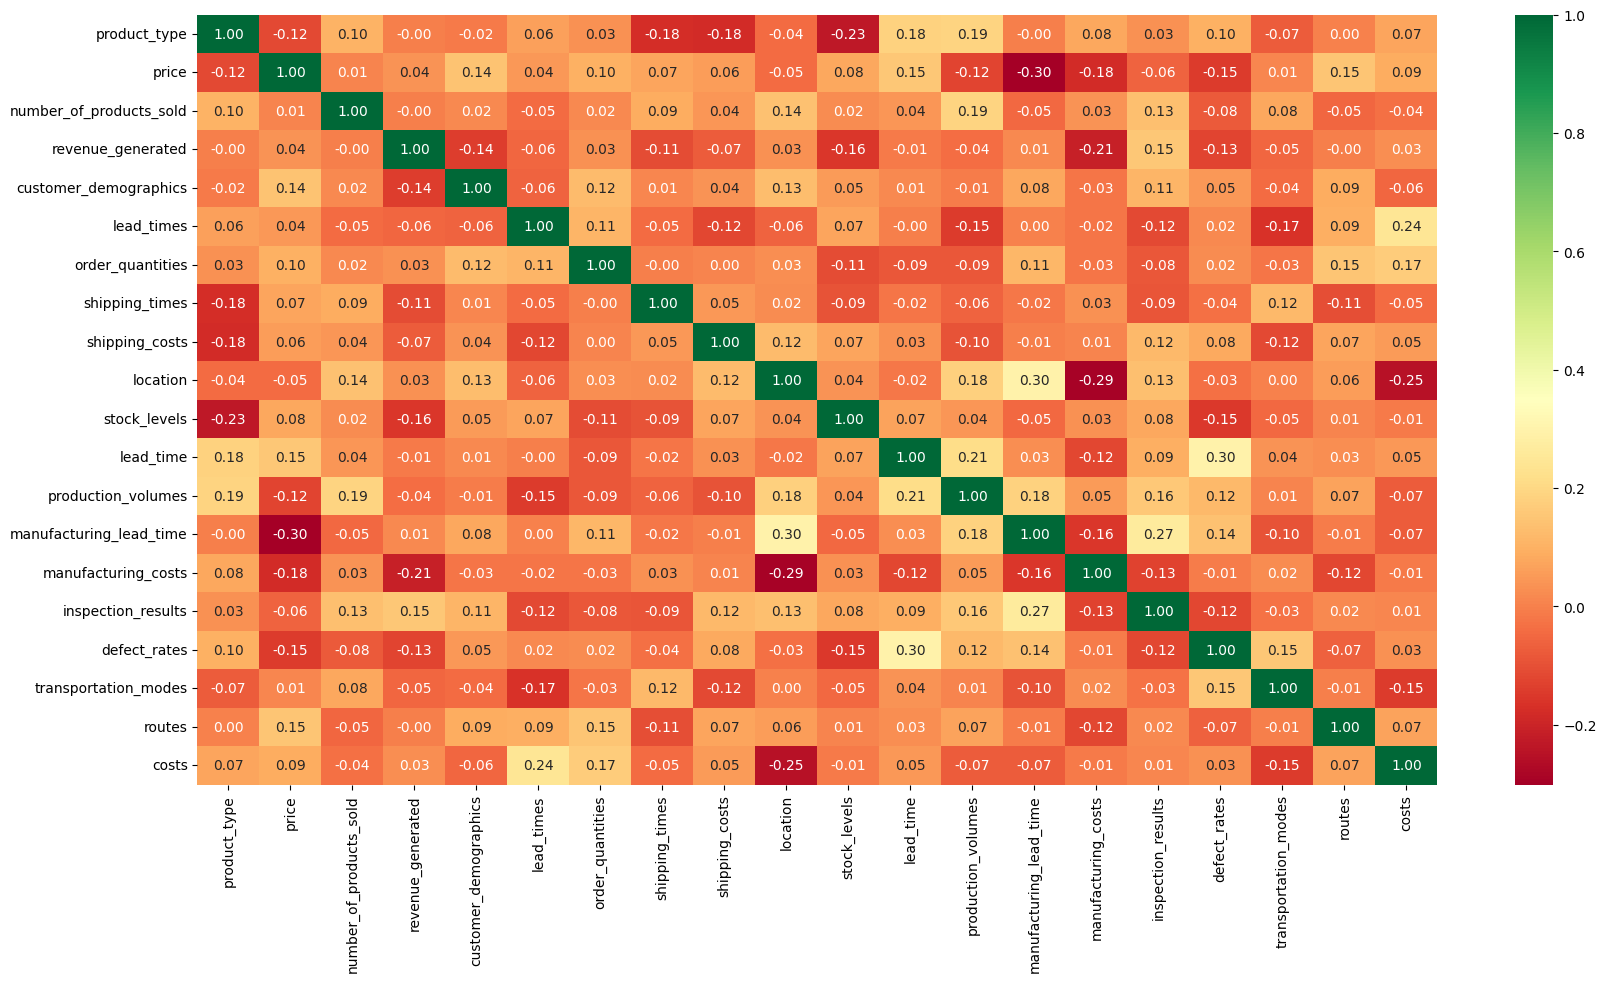

In [15]:
SC_features=MP_SC[['product_type','price',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities', 'shipping_times',
        'shipping_costs', 'location', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs']]
fig = plt.figure(figsize=(20,10))
sns.heatmap(SC_features.corr(), annot = True, fmt = '.2f', cmap = "RdYlGn")

In [16]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [17]:
MP=MP_SC[['product_type','price',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities', 'shipping_times',
        'shipping_costs', 'location', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs']]

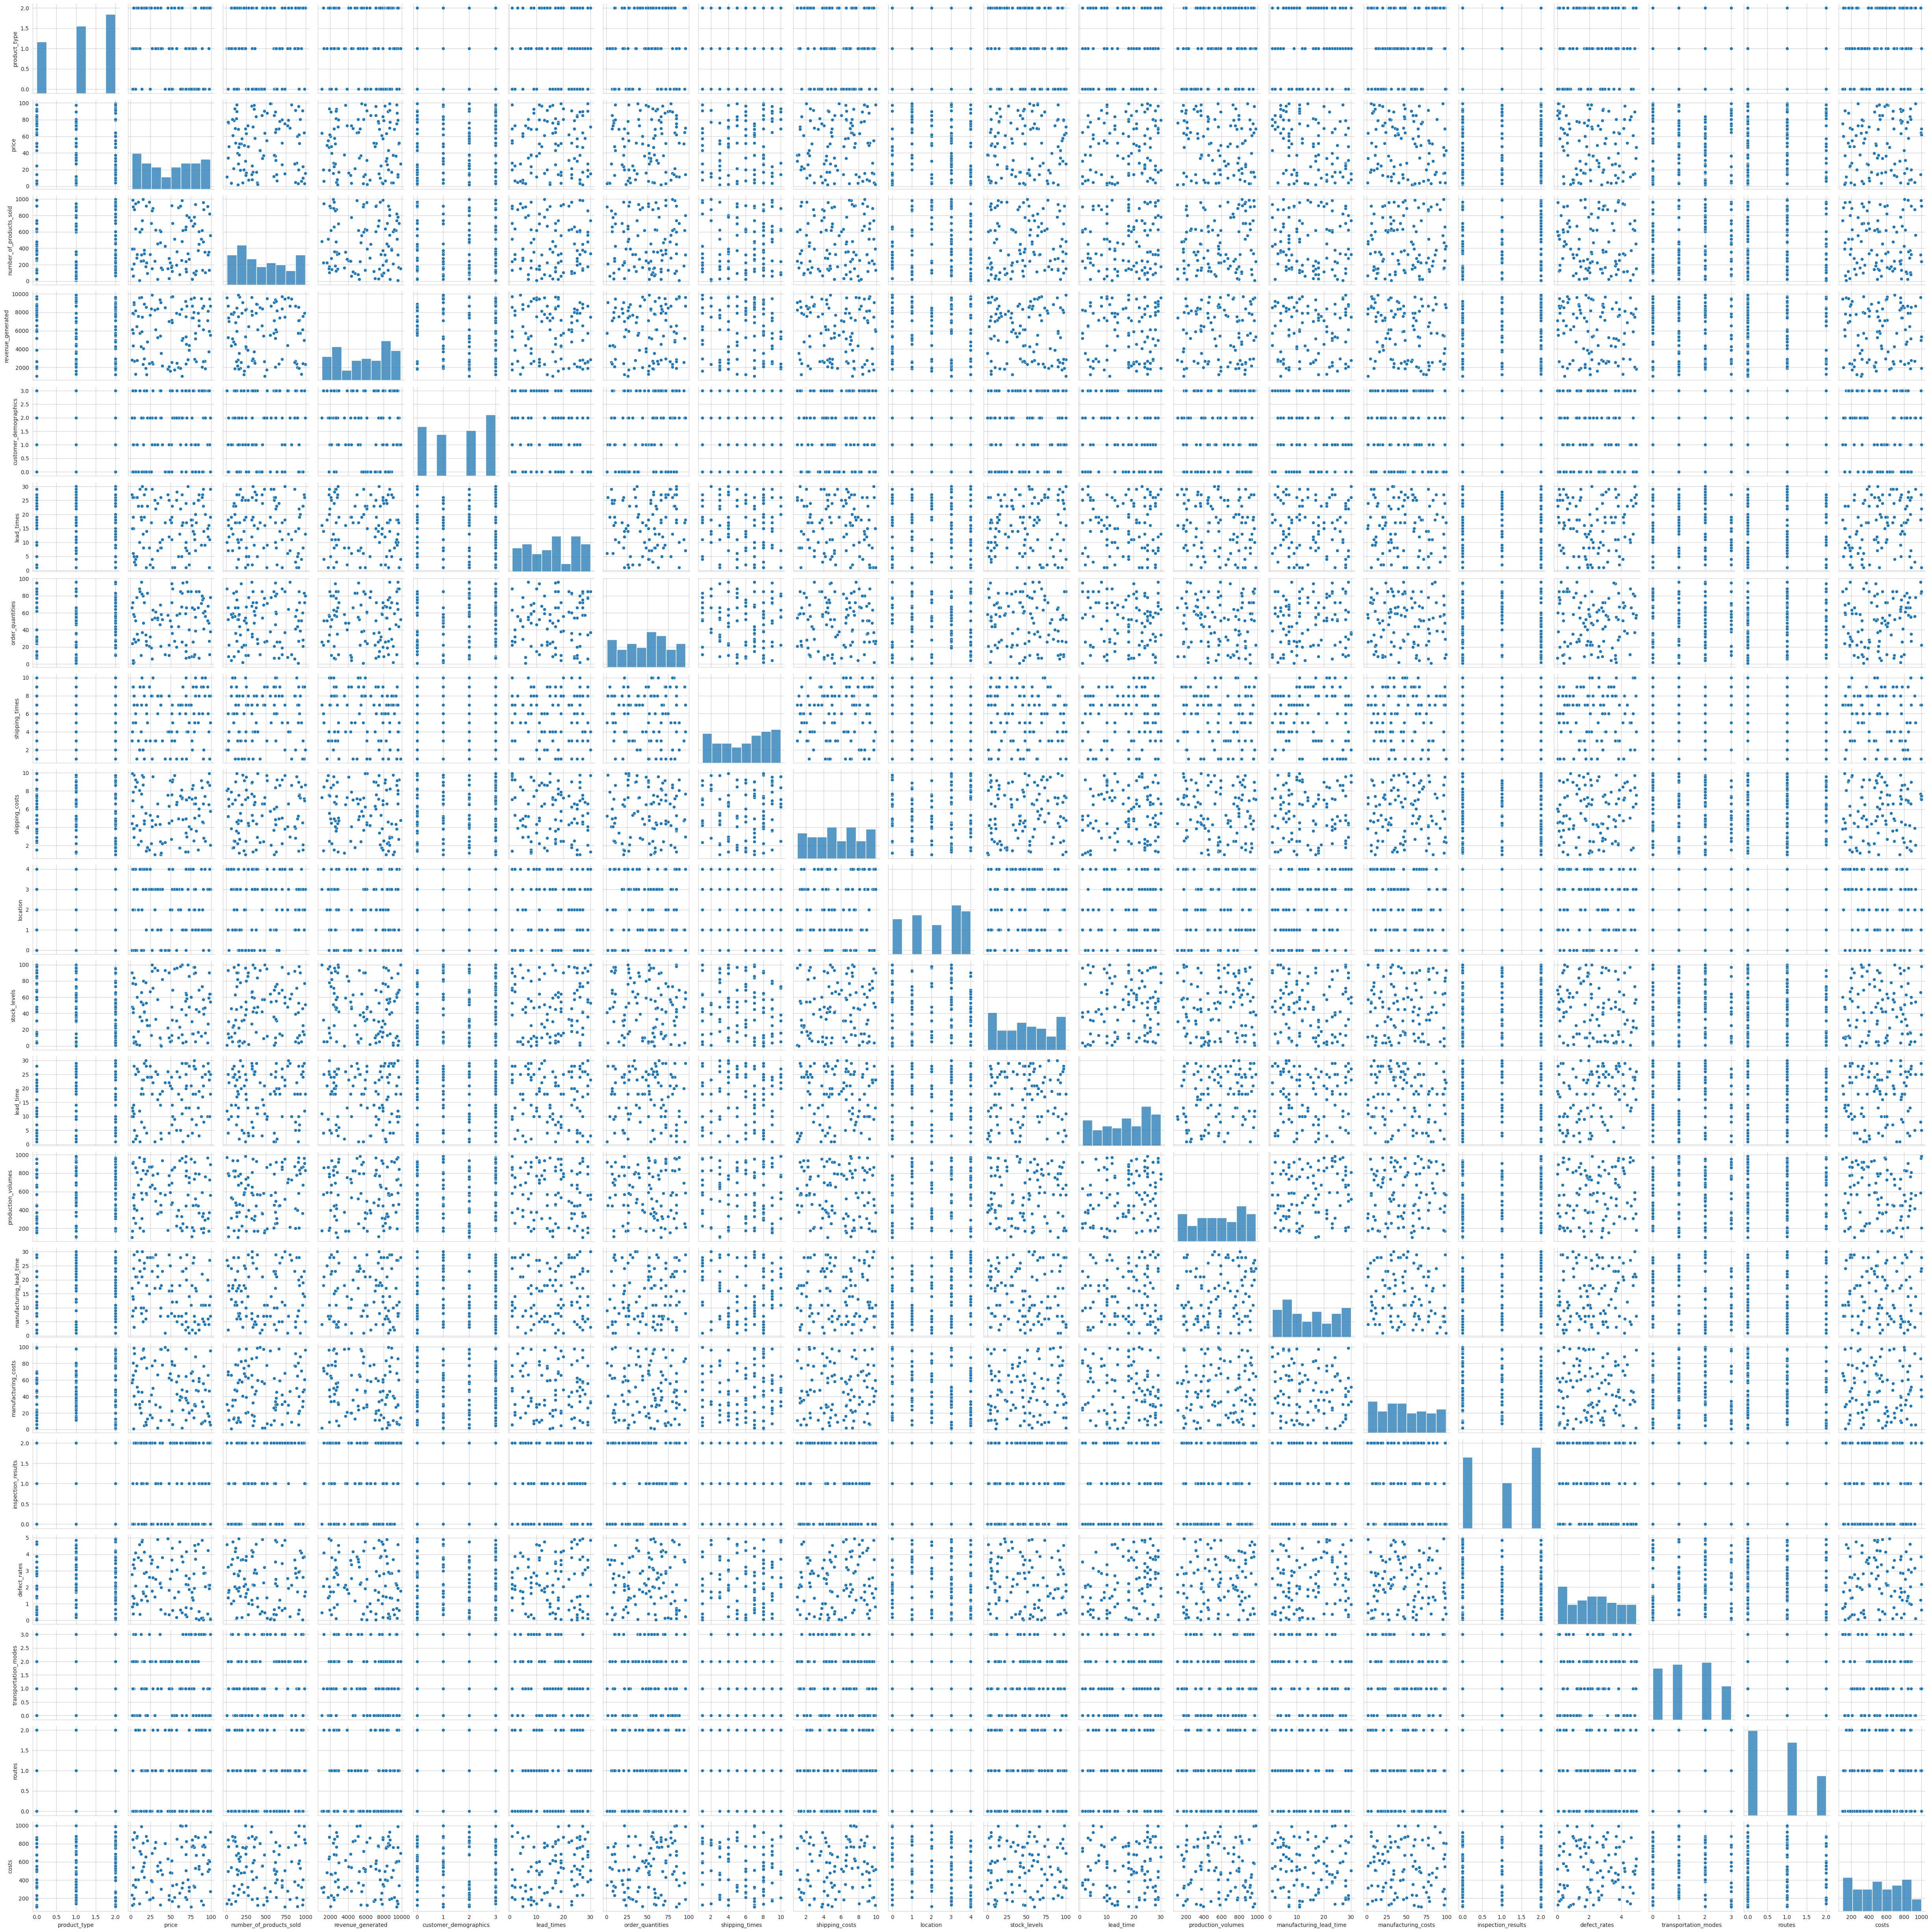

In [18]:
sb.pairplot(MP)

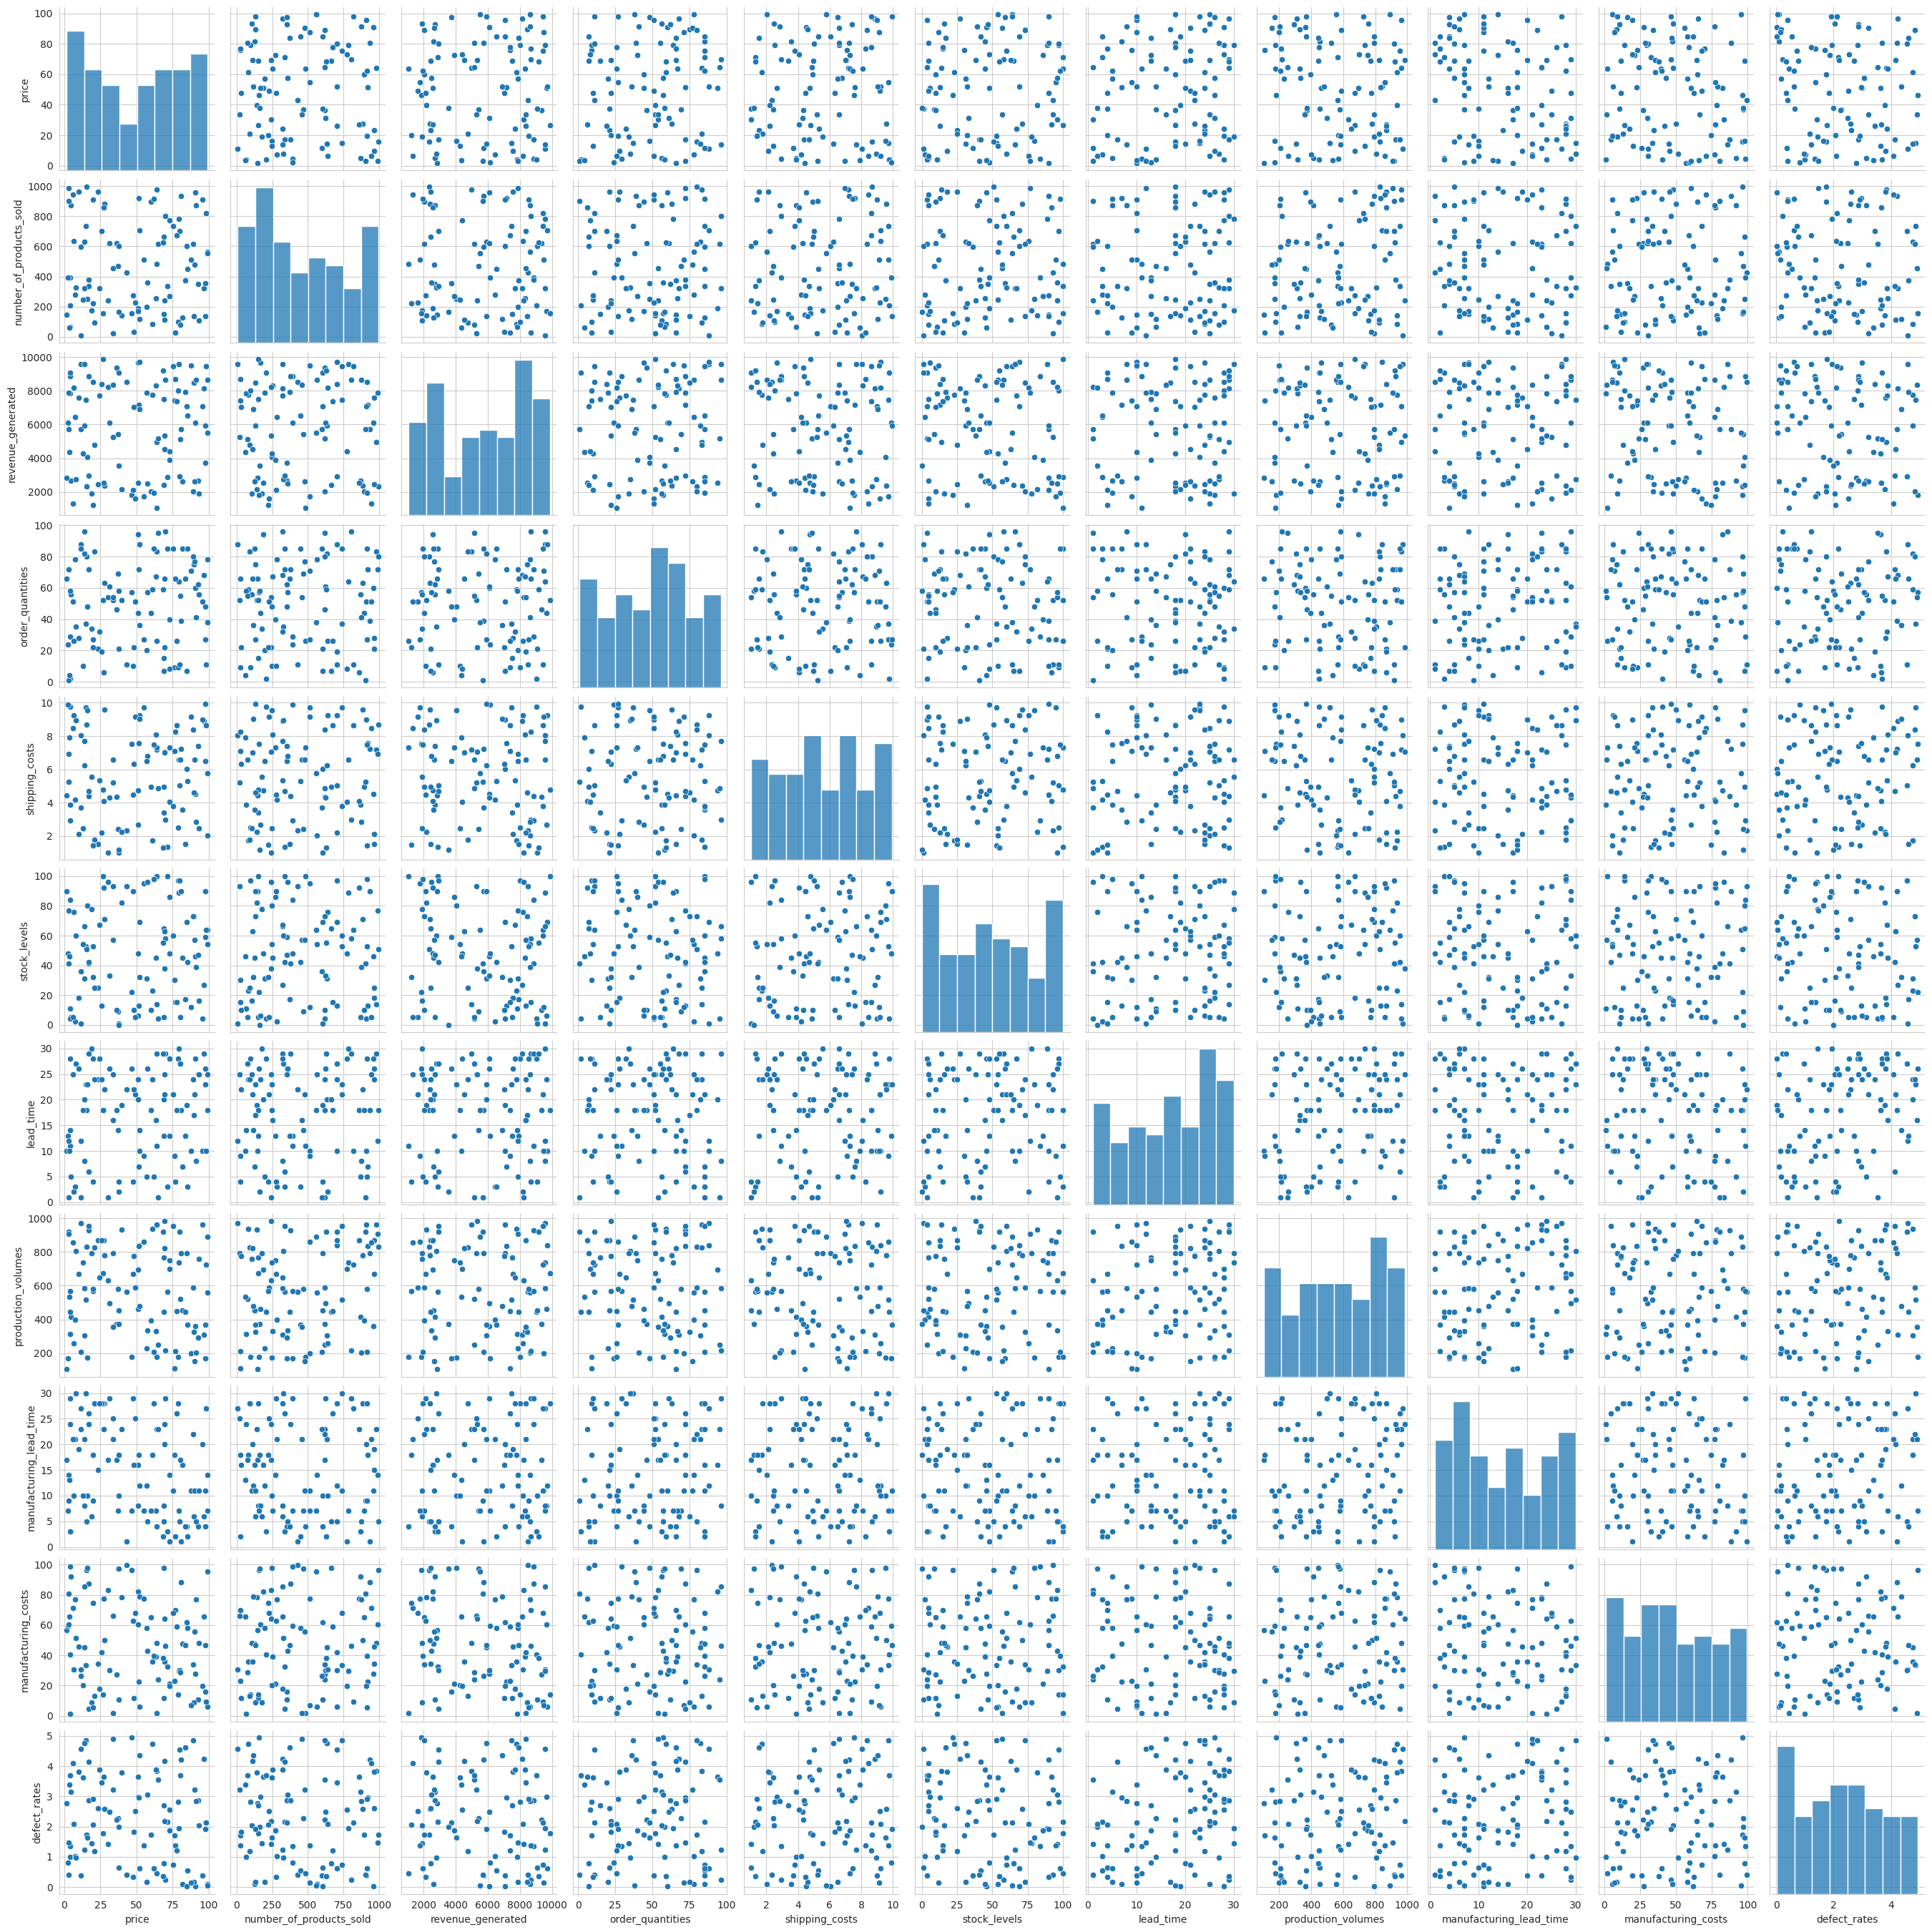

In [19]:
STOCK=MP_SC[['price',
       'number_of_products_sold', 'revenue_generated', 'order_quantities',
        'shipping_costs', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'defect_rates']]
sb.pairplot(STOCK)

In [20]:
STOCK=MP_SC[['product_type','price',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities', 'shipping_times',
        'shipping_costs', 'location', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs']]

In [21]:
corr=STOCK.corr()
corr

product_type     price  number_of_products_sold  \
product_type                 1.000000 -0.118260                 0.104189   
price                       -0.118260  1.000000                 0.005739   
number_of_products_sold      0.104189  0.005739                 1.000000   
revenue_generated           -0.003482  0.038424                -0.001641   
customer_demographics       -0.015001  0.141159                 0.015365   
lead_times                   0.063697  0.044855                -0.046419   
order_quantities             0.031378  0.095819                 0.015992   
shipping_times              -0.177486  0.071942                 0.087315   
shipping_costs              -0.184026  0.058543                 0.044285   
location                    -0.042242 -0.045747                 0.139708   
stock_levels                -0.234523  0.078261                 0.022189   
lead_time                    0.182971  0.152185                 0.041230   
production_volumes           0.188841 -0.124575                 0.187945   
manufacturing_lead_time     -0.002508 -0.301313                -0.048939   
manufacturing_costs          0.077401 -0.184123                 0.034284   
inspection_results           0.032807 -0.060739                 0.133273   
defect_rates                 0.099739 -0.147247                -0.082726   
transportation_modes        -0.073864  0.008989                 0.075610   
routes                       0.003619  0.149359                -0.053316   
costs                        0.070671  0.088501                -0.036951   

                         revenue_generated  customer_demographics  lead_times  \
product_type                     -0.003482              -0.015001    0.063697   
price                             0.038424               0.141159    0.044855   
number_of_products_sold          -0.001641               0.015365   -0.046419   
revenue_generated                 1.000000              -0.143585   -0.057296   
customer_demographics            -0.143585               1.000000   -0.062386   
lead_times                       -0.057296              -0.062386    1.000000   
order_quantities                  0.029422               0.121561    0.105459   
shipping_times                   -0.109211               0.009490   -0.045156   
shipping_costs                   -0.072892               0.036614   -0.120746   
location                          0.033924               0.127493   -0.061358   
stock_levels                     -0.158480               0.051869    0.072571   
lead_time                        -0.014178               0.014808   -0.002818   
production_volumes               -0.037441              -0.007385   -0.145324   
manufacturing_lead_time           0.014073               0.078132    0.003364   
manufacturing_costs              -0.214025              -0.025202   -0.024441   
inspection_results                0.152314               0.107667   -0.115951   
defect_rates                     -0.125335               0.048838    0.015681   
transportation_modes             -0.052785              -0.042649   -0.169066   
routes                           -0.002071               0.088044    0.093482   
costs                             0.027252              -0.056375    0.243686   

                         order_quantities  shipping_times  shipping_costs  \
product_type                     0.031378       -0.177486       -0.184026   
price                            0.095819        0.071942        0.058543   
number_of_products_sold          0.015992        0.087315        0.044285   
revenue_generated                0.029422       -0.109211       -0.072892   
customer_demographics            0.121561        0.009490        0.036614   
lead_times                       0.105459       -0.045156       -0.120746   
order_quantities                 1.000000       -0.002561        0.004261   
shipping_times                  -0.002561        1.000000        0.045108   
shipping_costs                   

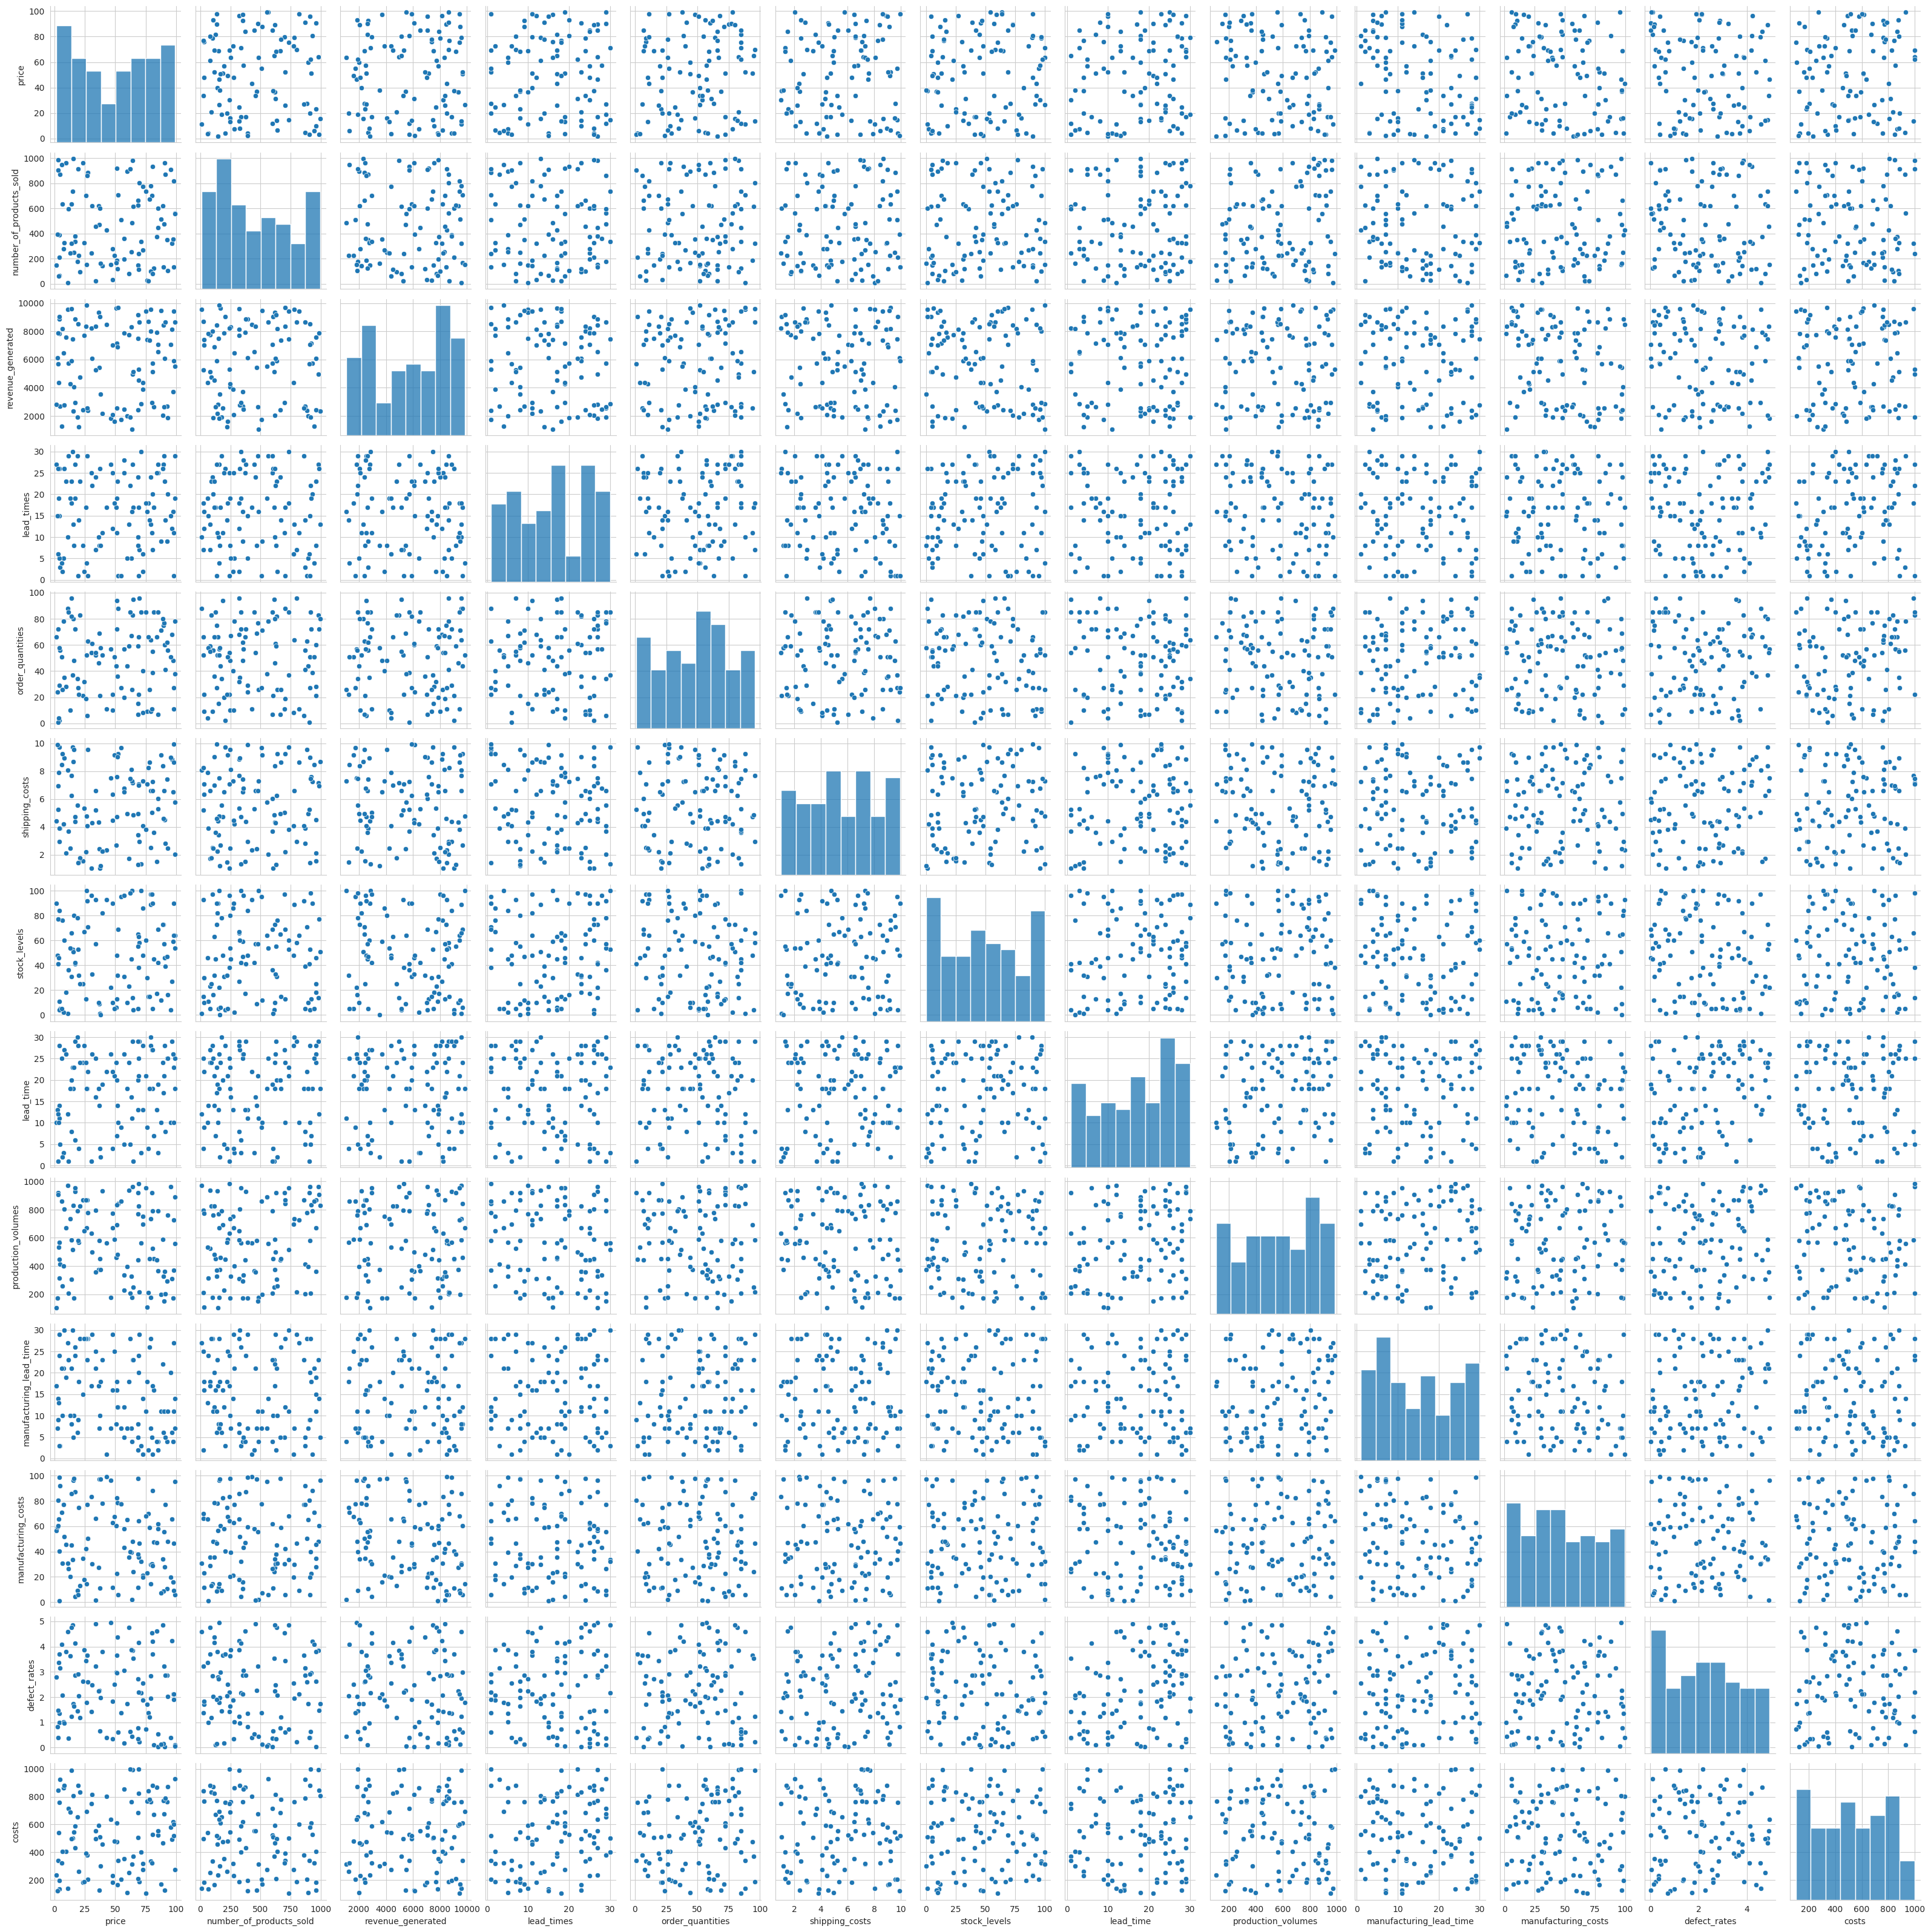

In [22]:
COSTS=MP_SC[['price',
       'number_of_products_sold', 'revenue_generated', 'lead_times', 'order_quantities',
        'shipping_costs', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'defect_rates', 'costs']]
sb.pairplot(COSTS)

In [23]:
COSTS=MP_SC[['product_type','price',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities', 'shipping_times',
        'shipping_costs', 'location', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs']]

In [24]:
corr=COSTS.corr()
corr

product_type     price  number_of_products_sold  \
product_type                 1.000000 -0.118260                 0.104189   
price                       -0.118260  1.000000                 0.005739   
number_of_products_sold      0.104189  0.005739                 1.000000   
revenue_generated           -0.003482  0.038424                -0.001641   
customer_demographics       -0.015001  0.141159                 0.015365   
lead_times                   0.063697  0.044855                -0.046419   
order_quantities             0.031378  0.095819                 0.015992   
shipping_times              -0.177486  0.071942                 0.087315   
shipping_costs              -0.184026  0.058543                 0.044285   
location                    -0.042242 -0.045747                 0.139708   
stock_levels                -0.234523  0.078261                 0.022189   
lead_time                    0.182971  0.152185                 0.041230   
production_volumes           0.188841 -0.124575                 0.187945   
manufacturing_lead_time     -0.002508 -0.301313                -0.048939   
manufacturing_costs          0.077401 -0.184123                 0.034284   
inspection_results           0.032807 -0.060739                 0.133273   
defect_rates                 0.099739 -0.147247                -0.082726   
transportation_modes        -0.073864  0.008989                 0.075610   
routes                       0.003619  0.149359                -0.053316   
costs                        0.070671  0.088501                -0.036951   

                         revenue_generated  customer_demographics  lead_times  \
product_type                     -0.003482              -0.015001    0.063697   
price                             0.038424               0.141159    0.044855   
number_of_products_sold          -0.001641               0.015365   -0.046419   
revenue_generated                 1.000000              -0.143585   -0.057296   
customer_demographics            -0.143585               1.000000   -0.062386   
lead_times                       -0.057296              -0.062386    1.000000   
order_quantities                  0.029422               0.121561    0.105459   
shipping_times                   -0.109211               0.009490   -0.045156   
shipping_costs                   -0.072892               0.036614   -0.120746   
location                          0.033924               0.127493   -0.061358   
stock_levels                     -0.158480               0.051869    0.072571   
lead_time                        -0.014178               0.014808   -0.002818   
production_volumes               -0.037441              -0.007385   -0.145324   
manufacturing_lead_time           0.014073               0.078132    0.003364   
manufacturing_costs              -0.214025              -0.025202   -0.024441   
inspection_results                0.152314               0.107667   -0.115951   
defect_rates                     -0.125335               0.048838    0.015681   
transportation_modes             -0.052785              -0.042649   -0.169066   
routes                           -0.002071               0.088044    0.093482   
costs                             0.027252              -0.056375    0.243686   

                         order_quantities  shipping_times  shipping_costs  \
product_type                     0.031378       -0.177486       -0.184026   
price                            0.095819        0.071942        0.058543   
number_of_products_sold          0.015992        0.087315        0.044285   
revenue_generated                0.029422       -0.109211       -0.072892   
customer_demographics            0.121561        0.009490        0.036614   
lead_times                       0.105459       -0.045156       -0.120746   
order_quantities                 1.000000       -0.002561        0.004261   
shipping_times                  -0.002561        1.000000        0.045108   
shipping_costs                   

****

## Data Visualisation

***GroupBy:***

Product type, Routes, Customer demographics, Shipping carrier, Location, and Transportation modes are divided into distinct groups using the "group by" method, and in each category, the key elements like Revenue, Costs, Stock levels, and Order quantities are examined.

In [25]:
Product = MPSCData.groupby('product_type') 
Route = MPSCData.groupby('routes')
Customer=MPSCData.groupby('customer_demographics')
Shipping=MPSCData.groupby('shipping_carriers')
Location=MPSCData.groupby('location')
Transportation=MPSCData.groupby('transportation_modes')

****

### Products Analysis

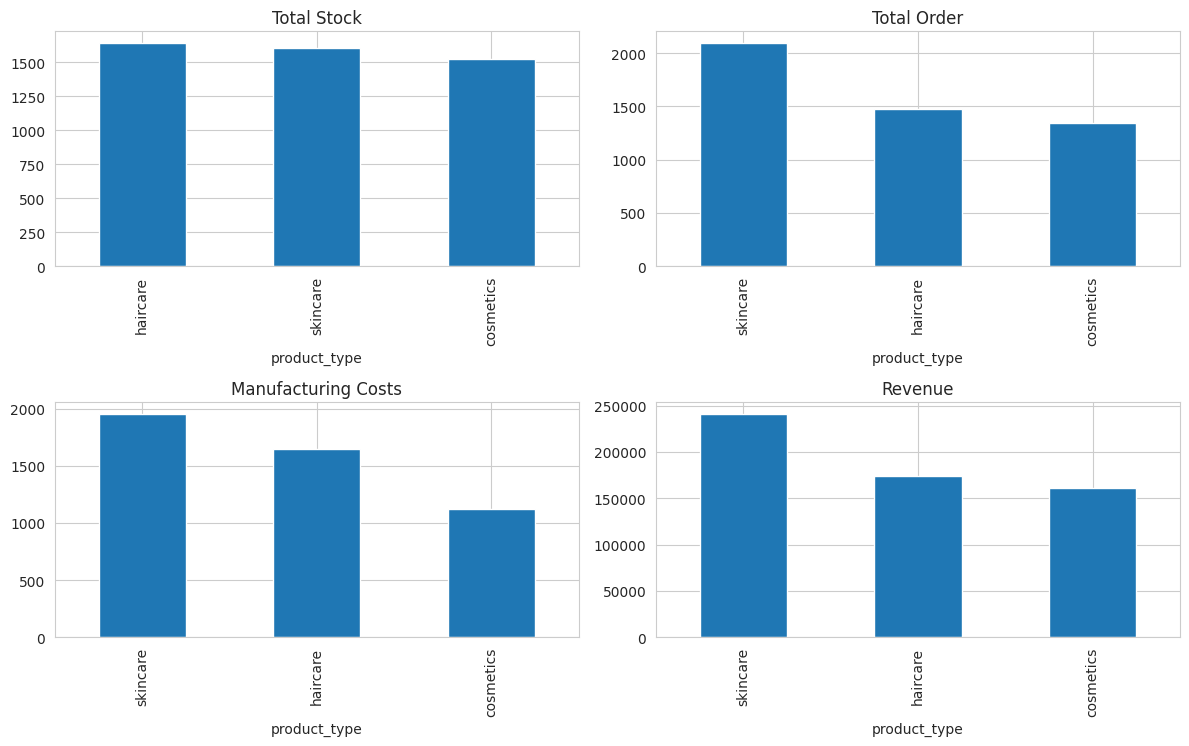

In [26]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Product['stock_levels'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Stock")

plt.subplot(4, 2, 2)
Product['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Product['manufacturing_costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Manufacturing Costs")

plt.subplot(4, 2, 4)
Product['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.tight_layout()
plt.show()

data_Products=MPSCData.groupby(['product_type'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Products, values='number_of_products_sold', names= 'product_type' , title= 'Total Number of Products Sold', 
       color='product_type',
             color_discrete_map={'cosmetics':'skyblue',
                                 'haircare':'navajowhite',
                              'skincare':'lawngreen'})



***

### Customers Analysis

In [27]:
data_Customers=MPSCData.groupby(['customer_demographics'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Customers, values='number_of_products_sold', names= 'customer_demographics' , title= 'Customer Segment', 
       color='customer_demographics',
             color_discrete_map={'Female':'lightgreen',
                                 'Male':'blue',
                                 'Non-binary':'orange',
                              'Unknown':'crimson'})


### Customer Segment by Products

In [28]:
Customer_Segment_by_Products= MPSCData.groupby(["customer_demographics","product_type"])["sku"].count().reset_index()
Customer_Segment_by_Products

customer_demographics product_type  sku
0                 Female    cosmetics   10
1                 Female     haircare    2
2                 Female     skincare   13
3                   Male    cosmetics    4
4                   Male     haircare   10
5                   Male     skincare    7
6             Non-binary    cosmetics    5
7             Non-binary     haircare    7
8             Non-binary     skincare   11
9                Unknown    cosmetics    7
10               Unknown     haircare   15
11               Unknown     skincare    9

In [29]:
bar_Customer_Segment_by_Products = px.bar(Customer_Segment_by_Products, x='customer_demographics', y='sku', \
    title='Customer Segment by Products',color='product_type')
bar_Customer_Segment_by_Products.show()

### Routes Analysis

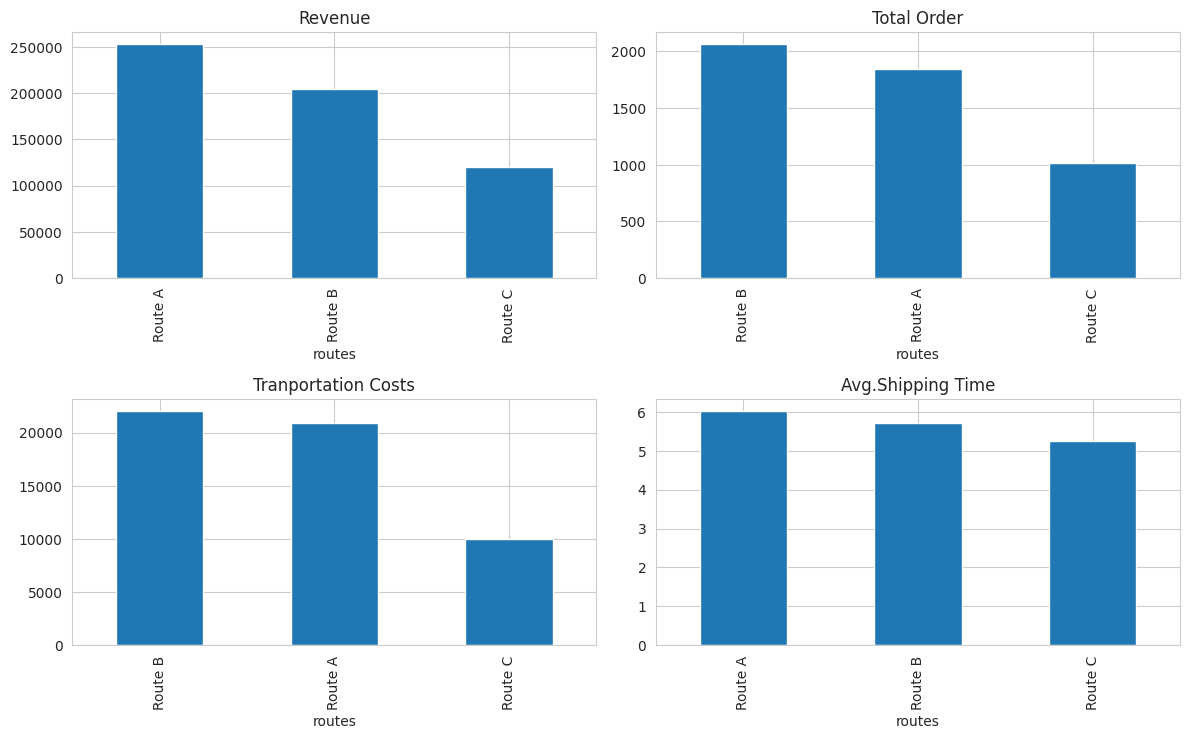

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Route['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.subplot(4, 2, 2)
Route['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Route['costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Tranportation Costs")

plt.subplot(4, 2, 4)

Route['shipping_times'].mean().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Avg.Shipping Time")

plt.tight_layout()
plt.show()


data_Routes=MPSCData.groupby(['routes'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Routes, values='number_of_products_sold', names= 'routes' , title= 'Routes', 
       color='routes',
             color_discrete_map={'Route A':'purple',
                                 'Route B':'lime',
                                 'Route C':'bisque'})

### Transportation Modes

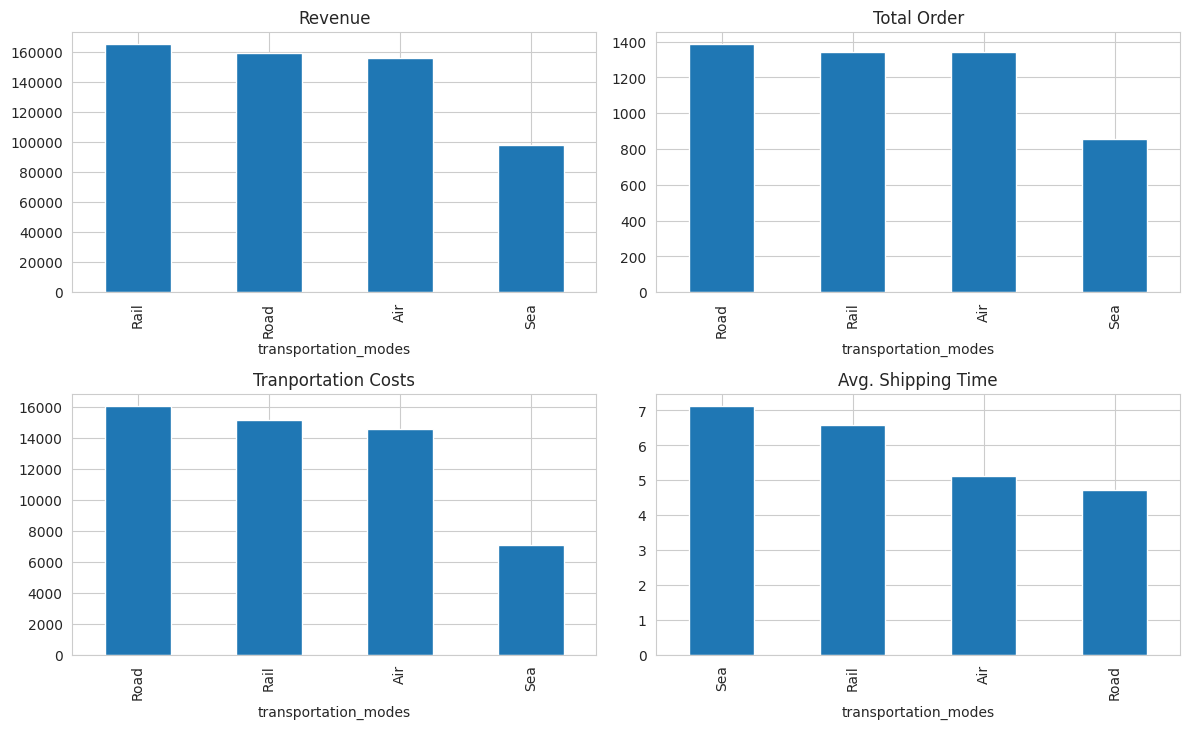

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Transportation['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.subplot(4, 2, 2)
Transportation['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Transportation['costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Tranportation Costs")

plt.subplot(4, 2, 4)

Transportation['shipping_times'].mean().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Avg. Shipping Time")

plt.tight_layout()
plt.show()



data_Transportation=MPSCData.groupby(['transportation_modes'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Transportation, values='number_of_products_sold', names= 'transportation_modes' , title= 'Transportation Modes', 
       color='transportation_modes',
             color_discrete_map={'Air':'deepskyblue',
                                 'Rail':'burlywood',
                                 'Road':'yellowgreen',
                              'Sea':'aquamarine'})

### Routes and Transportation modes

In [32]:
Routes_by_Transportation= MPSCData.groupby(["routes","transportation_modes"])["sku"].count().reset_index()
Routes_by_Transportation

routes transportation_modes  sku
0   Route A                  Air   11
1   Route A                 Rail   14
2   Route A                 Road   11
3   Route A                  Sea    7
4   Route B                  Air    7
5   Route B                 Rail   11
6   Route B                 Road   13
7   Route B                  Sea    6
8   Route C                  Air    8
9   Route C                 Rail    3
10  Route C                 Road    5
11  Route C                  Sea    4

In [33]:
bar_Routes_by_Transportation = px.bar(Routes_by_Transportation, x='routes', y='sku', \
    title='Routes_by_Transportation Modes',color='transportation_modes')
bar_Routes_by_Transportation.show()

******

## Data Modelling

Data modelling in supply chain management allows a company to respond quickly to market trends, adapt production, and optimise logistics to ensure optimal supply chain performance. Consequently, a company will be able to maximise production, optimise transportation, and save money. Furthermore, the company can make data-driven decisions and take proactive measures to meet customer expectations, streamline processes, and optimise resources (Siththardhan, 2023).

### Regression Models

Regression models can identify patterns, recognize demand indications, and identify correlations between variables in large datasets. According to [McKinsey](#4) ML-based supply chain solutions can cut prediction mistakes by up to 50%.

In [34]:
train_MPSC = MP_SC.copy()

#### Linear Regression for *Stock Level*

In [35]:
train_MPSC['lead_times']=train_MPSC['lead_times'].astype(int)
train_MPSC['shipping_times']= train_MPSC['shipping_times'].astype(int)
train_MPSC['lead_time']= train_MPSC['lead_time'].astype(int)
train_MPSC['manufacturing_lead_time']= train_MPSC['manufacturing_lead_time'].astype(int)

In [36]:
X=train_MPSC[[ 'sku', 'price',
        'revenue_generated',
        'lead_times', 'shipping_times', 'shipping_costs',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates', 'routes', 'costs']]

Y=train_MPSC[['stock_levels']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()# Scale the data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [39]:
# Evaluate the model on the testing set
Y_pred = model.predict(X_test_scaled)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")


R-squared: 0.17137875821294124


Cohen (1988) suggested R2 values for endogenous latent variables are assessed as follows: 0.26 (substantial), 0.13 (moderate), 0.02 (weak).

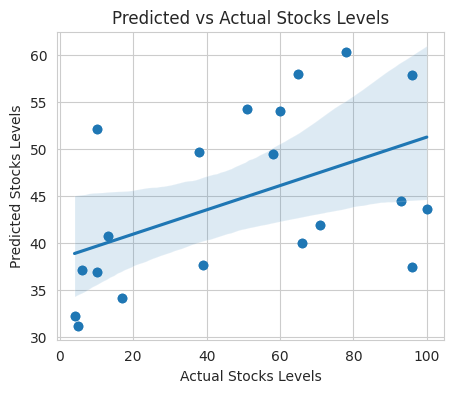

In [40]:
# Create a scatter plot with the actual Stocks Levels on the x-axis and the predicted Stocks Levels values on the y-axis
plt.scatter(Y_test, Y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=Y_test, y=Y_pred)

plt.xlabel('Actual Stocks Levels')
plt.ylabel('Predicted Stocks Levels')
plt.title('Predicted vs Actual Stocks Levels')
plt.show()

#### Linear Regression for *Transportation Costs*

In [41]:
train_MPSC['Intercept'] = 1
X=train_MPSC[['Intercept', 'sku', 'lead_times', 'order_quantities', 'location']]

Y=train_MPSC[['costs']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()# Scale the data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [44]:
# Evaluate the model on the testing set
Y_pred = model.predict(X_test_scaled)
r2 = r2_score(Y_test, Y_pred)
ols_model = sm.OLS(MP_SC['costs'], X)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  costs   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.796
Date:                Tue, 05 Sep 2023   Prob (F-statistic):            0.00144
Time:                        20:45:50   Log-Likelihood:                -687.61
No. Observations:                 100   AIC:                             1385.
Df Residuals:                      95   BIC:                             1398.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          354.4269     91.656      3.867      0.000     172.466     536.388
sku                  1.5393      0.853      1.804      0.074      -0.155       3.233
lead_times           6.3040      2.773      2.274      0.025       0.799      11.809
order_quantities     1.8121      0.928      1.952      0.054      -0.031       3.655
location           -42.8092     16.928     -2.529      0.013     -76.415      -9.203
==============================================================================
Omnibus:                        6.692   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.874
Skew:                          -0.003   Prob(JB):                        0.238
Kurtosis:                       2.169   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1-I examined the p-value for predictor variables. To decide on the retention of a predictor variable in the model, its p-value must be less than 0.05 which means that the test hypothesis is false or should be rejected.

2-If the p-value is less than 0.05, it can be said that there is a statistically significant relationship between these predictor variables and the response variable.  

3-If the p-value is greater than 0.05 for the predictor variables, it means that no effect was observed. So this variable does not affect the response variable. 

4-I performed the OLS regression model again by removing the predictor variables that had a p-value above 0.05.

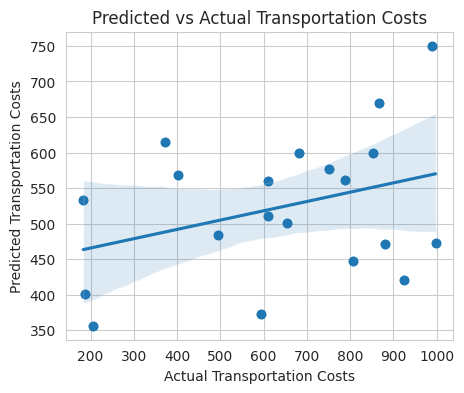

In [45]:
# Create a scatter plot with the actual Transportation Costs on the x-axis and the predicted Transportation Costs values on the y-axis
plt.scatter(Y_test, Y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=Y_test, y=Y_pred)

plt.xlabel('Actual Transportation Costs')
plt.ylabel('Predicted Transportation Costs')
plt.title('Predicted vs Actual Transportation Costs')
plt.show()

******

### Classification Models

In machine learning, classification is the process of predicting a categorical label for a given input point. A trained algorithm uses input features to map inputs to class labels (datacamp, 2023).

#### KNN Classifier for Routes

KNN is the most basic classification algorithm in Machine Learning. It belongs to the supervised learning domain and is used extensively for pattern recognition, data mining, and intrusion detection." The KNN algorithm is non-parametric, meaning it does not assume anything about the distribution of the data and the model structure is determined entirely by the data. To predict the classification of a new sample point based on the K (integer number) closest points in a database, it uses a database in which the data points are separated into several classes. We use the k-nearest neighbour algorithm to fit historical data and predict the future.

In [46]:
train_MP=MP_SC.copy()

<Axes: xlabel='sku', ylabel='costs'>

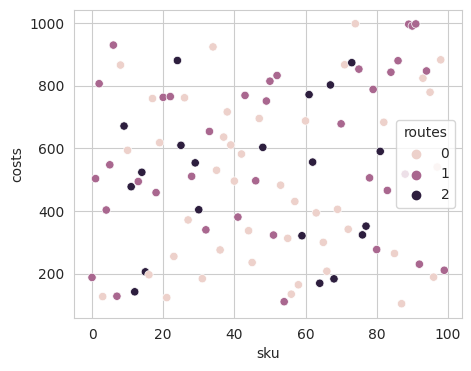

In [47]:
sns.scatterplot(x=train_MP['sku'],y=train_MP['costs'], hue=train_MP['routes'])

I use cross-validation to find the accuracy scores, which means the data needs to scale, then loop over the values and add the scores to the list.
I pass an instance of the kNN model as well as the data and several splits to be performed. I use five splits, which means that the model divides the data into five equal-sized groups, four of which are used to train and one to test the outcome. It will loop through each group and give an accuracy score, which it will average to find the best model.

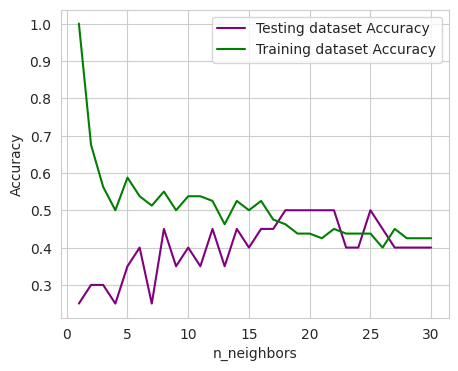

In [48]:
# Create feature and target arrays
X = train_MP[['product_type', 'sku', 'price', 'availability', 'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_carriers', 'shipping_costs', 'supplier_name', 'location', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results', 'defect_rates', 'transportation_modes', 'costs']]
y = train_MP[['routes']]
 
    
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)


neighbors = np.arange(1, 31)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy', color="purple")
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy', color="green")
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [49]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=30)
 
#Fit the model
knn.fit(X_train,y_train) 
#Get accuracy. 
#Note: In case of classification algorithms score method 
#represents accuracy. 
knn.score(X_test,y_test)


0.4

In [50]:
X = train_MP[['product_type', 'sku', 'price', 'availability', 'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_carriers', 'shipping_costs', 'supplier_name', 'location', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results', 'defect_rates', 'transportation_modes', 'costs']]
y = train_MP[['routes']]

  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
  
  # Calculate the accuracy of the model
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[3 4 1]
 [3 5 0]
 [2 2 0]]


****

In [51]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))


Text(0, 0.5, 'Accuracy Score')

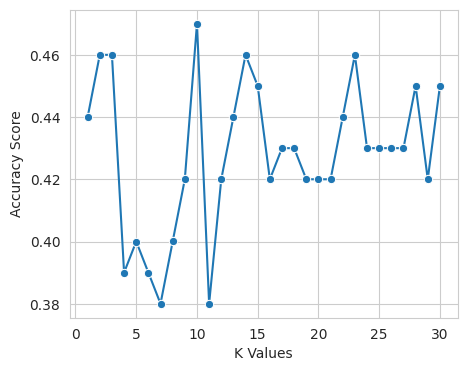

In [52]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")